In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url='https://raw.githubusercontent.com/DivyaKampalli/amazon-cell-phone-reviews/master/20191226-items.csv'

In [ ]:
items= pd.read_csv(url)

In [ ]:
print("The dataset contains {0[0]: .0f} rows and {0[1]: .0f} columns.".format(items.shape))

The dataset contains  720 rows and  10 columns.


In [ ]:
items.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [ ]:
items.tail()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
715,B07ZPKZSSC,Apple,"Apple iPhone 11 Pro, 64GB, Fully Unlocked - Sp...",https://www.amazon.com/Apple-iPhone-64GB-Fully...,https://m.media-amazon.com/images/I/41wDuEW9iZ...,1.0,https://www.amazon.com/product-reviews/B07ZPKZSSC,1,949.00,0.00
716,B07ZQSGP53,Xiaomi,"Xiaomi Redmi Note 8, 32GB/3GB RAM 6.3"" FHD+ Di...",https://www.amazon.com/Xiaomi-Display-Snapdrag...,https://m.media-amazon.com/images/I/41foh4FKHE...,4.6,https://www.amazon.com/product-reviews/B07ZQSGP53,3,150.96,0.00
717,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00
718,B081TJFVCJ,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",https://www.amazon.com/Apple-iPhone-64GB-Gray-...,https://m.media-amazon.com/images/I/71yMgOenT5...,5.0,https://www.amazon.com/product-reviews/B081TJFVCJ,1,478.97,0.00
719,B0825BB7SG,Samsung,Straight Talk Samsung Galaxy A10e Smartphone 5...,https://www.amazon.com/Straight-Samsung-Galaxy...,https://m.media-amazon.com/images/I/81+3SWSAhD...,5.0,https://www.amazon.com/product-reviews/B0825BB7SG,1,139.00,139.26


In [ ]:
items.describe(include="all")

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
count,720,716,720,720,720,720.000000,720,720.000000,720.000000,720.000000
unique,720,10,718,720,679,NaN,720,NaN,NaN,NaN
top,B07NRCRFVJ,Samsung,Google Pixel 2 XL 128GB Unlocked GSM/CDMA 4G L...,https://www.amazon.com/Samsung-SM-A505G-Infini...,https://m.media-amazon.com/images/I/817r8IrEN5...,NaN,https://www.amazon.com/product-reviews/B07GDW4N5C,NaN,NaN,NaN
freq,1,346,2,1,3,NaN,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.713750,NaN,105.679167,234.948931,63.690778
std,NaN,NaN,NaN,NaN,NaN,0.716014,NaN,167.601101,200.008441,172.405370
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,3.300000,NaN,7.000000,97.512500,0.000000
50%,NaN,NaN,NaN,NaN,NaN,3.800000,NaN,32.000000,188.975000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,4.100000,NaN,122.250000,336.725000,0.000000


In [ ]:
url1='https://raw.githubusercontent.com/DivyaKampalli/amazon-cell-phone-reviews/master/20191226-reviews.csv'

In [ ]:
reviews=pd.read_csv(url1)

In [ ]:
print("The dataset contains {0[0]: .0f} rows and {0[1]: .0f} columns.".format(reviews.shape))

The dataset contains  67986 rows and  8 columns.


In [ ]:
reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [ ]:
reviews.tail()

,asin,name,rating,date,verified,title,body,helpfulVotes
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN
67985,B0825BB7SG,Owen Gonzalez,5,"December 11, 2019",False,Outstanding phone for the price,I love the size and style of this phone. It is...,NaN


In [ ]:
reviews.describe(include="all")

,asin,name,rating,date,verified,title,body,helpfulVotes
count,67986,67984,67986.000000,67986,67986,67972,67965,27215.000000
unique,720,47323,NaN,2983,2,41489,59811,NaN
top,B00F2SKPIM,Amazon Customer,NaN,"December 11, 2019",True,Five Stars,Good,NaN
freq,981,6507,NaN,234,61225,6043,303,NaN
mean,NaN,NaN,3.807916,NaN,NaN,NaN,NaN,8.229690
std,NaN,NaN,1.582906,NaN,NaN,NaN,NaN,31.954877
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,2.000000
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,5.000000


In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
plt.style.use("ggplot")

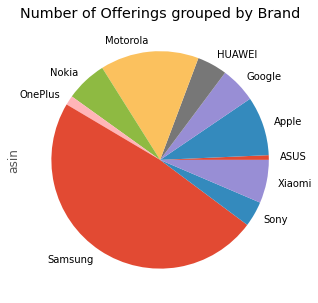

In [ ]:
ax = items.groupby("brand").count()["asin"].plot(kind="pie", figsize=(8, 5),title="Number of Offerings grouped by Brand")

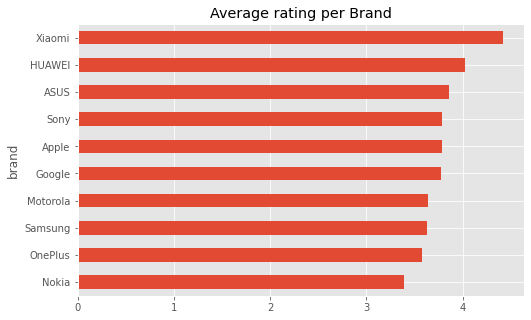

In [ ]:
ax = items.groupby("brand").mean()["rating"].sort_values().plot(kind="barh",figsize=(8,5),title="Average rating per Brand")


In [ ]:
reviews["positivity"] = reviews["rating"].apply(lambda x: 1 if x>3 else(0 if x==3 else -1)) 

In [ ]:
reviews = pd.merge(reviews, items, how="left", left_on="asin", right_on="asin")

In [ ]:
reviews.rename(columns={"rating_x": "rating", "title_x": "title", "title_y": "item_title", "rating_y": "overall_rating"}, inplace=True)
reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes,positivity,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,-1,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,1,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,1,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0


 0.6 Convert string into datetime


In [ ]:
from datetime import datetime
reviews["date"] = reviews["date"].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))
reviews["date"].head()

0   2005-10-11
1   2004-01-07
2   2003-12-30
3   2004-03-18
4   2005-08-28
Name: date, dtype: datetime64[ns]

 Truncate date column to month


In [ ]:
reviews["month"] = reviews["date"].apply(lambda x: x.replace(day=1))
reviews["month"].head()

0   2005-10-01
1   2004-01-01
2   2003-12-01
3   2004-03-01
4   2005-08-01
Name: month, dtype: datetime64[ns]

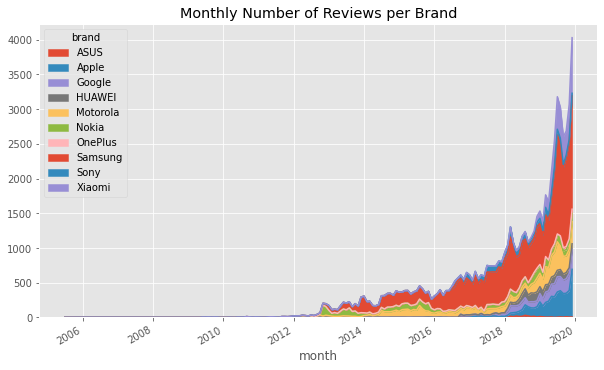

In [ ]:
ax = pd.pivot_table(reviews, 
                    index="month", 
                    columns="brand", 
                    values="asin", 
                    aggfunc="count", 
                    fill_value=0).plot.area(title="Monthly Number of Reviews per Brand", figsize=(10, 6))

In [ ]:
# 0.9 Add posivity label
reviews["positivity"] = reviews["rating"].apply(lambda x: 1 if x>3 else(0 if x==3 else -1))


 Plot reviews over time

Text Cleaning
This section creates functions to clean text, which includes:

Convert the text into lowercase,
Remove punctuation,
Remove stopwords (English, from nltk corpus),
Remove other keywords like "phone" and brand name.



In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import string

In [ ]:
stop = set(stopwords.words('english'))

In [ ]:
punc = set(string.punctuation)

In [ ]:
keywords = reviews["brand"].apply(lambda x: str(x).lower()).unique().tolist()

In [ ]:
keywords.append("phone")

In [ ]:
lemma = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes,positivity,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,price,originalPrice,month
0,B0000SX2UC,Janet,3,2005-10-11,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,2005-10-01
1,B0000SX2UC,Luke Wyatt,1,2004-01-07,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,-1,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,2004-01-01
2,B0000SX2UC,Brooke,5,2003-12-30,False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,1,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,2003-12-01
3,B0000SX2UC,amy m. teague,3,2004-03-18,False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,2004-03-01
4,B0000SX2UC,tristazbimmer,4,2005-08-28,False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,1,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,2005-08-01


In [ ]:
def clean_text(text):
    # Convert the text into lowercase
    text = text.lower()
    # Split into list
    wordList = text.split()
    # Remove punctuation
    wordList = ["".join(x for x in word if (x=="'")|(x not in punc)) for word in wordList]
     # Remove stopwords
    wordList = [word for word in wordList if word not in stop]
    # Remove other keywords
    wordList = [word for word in wordList if word not in keywords]
    # Lemmatisation
    wordList = [lemma.lemmatize(word) for word in wordList]
    return " ".join(wordList)
clean_text("I love reading books and watching TV.")

'love reading book watching tv'

In [ ]:
reviews["body"] = reviews["body"].astype("str")

In [ ]:
reviews["clean_text"] = reviews["body"].apply(clean_text)

In [ ]:
reviews["clean_text"].head().values

array(["a600 awhile absolute doo doo read review detect rage stupid thing finally died used bought garage sale 1 wonder sold cheap bad  hate menu take forever get want scroll endlessly usually phone numbered category u simply press  get want go  pain put silent vibrate class ring turn immediately there's fast way silence damn thing always remember put silent learned hard way  true case mission get break ur nail process also damage case time u try reason started giving problem succeed opening  button could bit bigger vibration could stronger good  reception shabby using elevator remarkable feat considering old would lose service simply putting pocket  compared old work quite well ring tone loud enough hear actually charge quickly great battery life heat like potatoe oven either long convos  nice bright large screen  cute way customize scroll bar set purple pink aqua orange etc overall okay serf purpose definitely pale comparison new phone coming sprint get get great",
       "due softwa

In [ ]:
def word_freq_dict(text):
    # Convert text into word list
    wordList = text.split()
    # Generate word freq dictionary
    wordFreqDict = {word: wordList.count(word) for word in wordList}
    return wordFreqDict
word_freq_dict("I love reading books. I love music.")

{'I': 2, 'books.': 1, 'love': 2, 'music.': 1, 'reading': 1}

In [ ]:
# 2.2 Create brand subsets
apple = reviews[reviews["brand"]=="Apple"].sort_values(by=["date"], ascending=False)
samsung = reviews[reviews["brand"]=="Samsung"].sort_values(by=["date"], ascending=False)
xiaomi = reviews[reviews["brand"]=="Xiaomi"].sort_values(by=["date"], ascending=False)

In [ ]:
# 2.3 Initializer
from wordcloud import WordCloud, ImageColorGenerator

# Define a function to create a wordcloud from dictionary of word frequency
def wordcloud_from_frequency(word_freq_dict, title, figure_size=(10, 6)):
    wordcloud.generate_from_frequencies(word_freq_dict)
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
    
# Define a function to plot top10 positive words and top10 negative words in a grouped bar plot (from dictionaries)
def topn_wordfreq_bar_both(pos_word_freq_dict, neg_word_freq_dict, pos_num_doc, neg_num_doc, topn, title, palette, height=6, aspect=2):
    # Transform positive word frequency into DF
    df_pos = pd.DataFrame.from_dict(pos_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_pos.columns = ["frequency"]
    df_pos["frequency"] = df_pos["frequency"] / pos_num_doc
    df_pos["label"] = "Positive"
    # Transform negative word frequency into DF
    df_neg = pd.DataFrame.from_dict(neg_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_neg.columns = ["frequency"]
    df_neg["frequency"] = df_neg["frequency"] / neg_num_doc
    df_neg["label"] = "Negative"
    # Append two dataframes
    df_append = df_pos.append(df_neg)
    df_append.reset_index(inplace=True)
    # Plot
    sns.catplot(x="index", y="frequency", hue="label", data=df_append, 
                kind="bar",
                palette=palette,
                height=height, aspect=aspect, 
                legend_out=False)
    plt.title(title)
    plt.show()

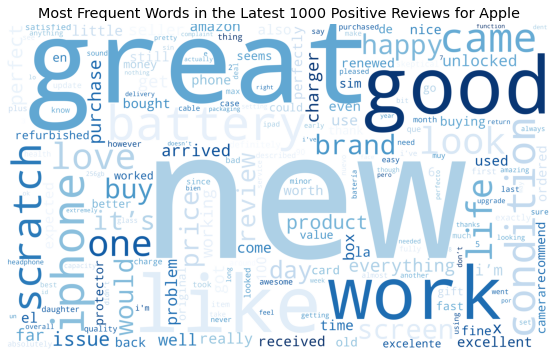

In [ ]:
# 2.4 Plot wordclouds for latest 1000 reviews for Apple
apple_pos = " ".join(apple[apple["positivity"]==1]["clean_text"][0:1000])
apple_pos_word_freq = word_freq_dict(apple_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Blues",
                      background_color="white")
wordcloud_from_frequency(apple_pos_word_freq, "Most Frequent Words in the Latest 1000 Positive Reviews for Apple")

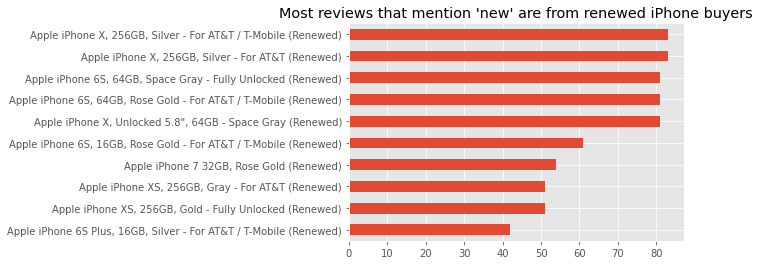

In [ ]:
apple[apple["clean_text"].apply(lambda x: "new" in x)]["item_title"].value_counts().sort_values(ascending=True).tail(10).plot(kind="barh")
plt.title("Most reviews that mention 'new' are from renewed iPhone buyers")
plt.show()

In [ ]:
apple["renewed"] = apple["item_title"].apply(lambda x: ("Renewed" in x) | ("Reburshied" in x))
print("{0: 0.1%} iPhones that were sold on Amazon are renewed/reburshied.".format(apple["renewed"].sum() / len(apple["renewed"])))

 100.0% iPhones that were sold on Amazon are renewed/reburshied.


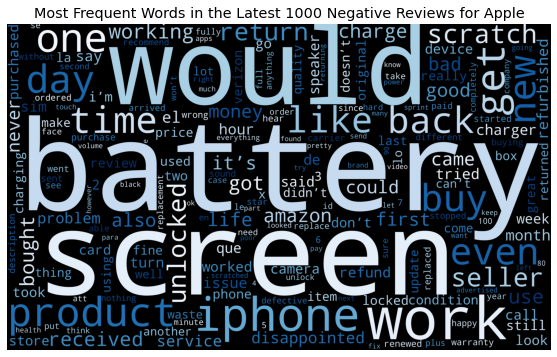

In [ ]:
apple_neg = " ".join(apple[apple["positivity"]==-1]["clean_text"][0:1000])
apple_neg_word_freq = word_freq_dict(apple_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Blues",
                      background_color="black")
wordcloud_from_frequency(apple_neg_word_freq, "Most Frequent Words in the Latest 1000 Negative Reviews for Apple")

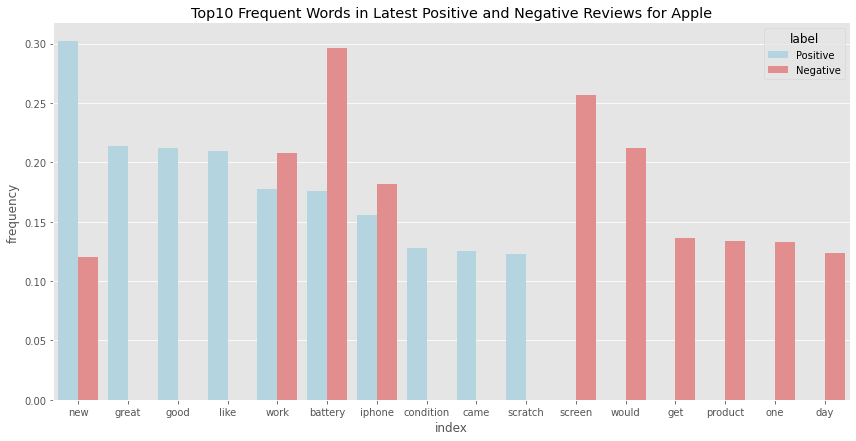

In [ ]:
topn_wordfreq_bar_both(apple_pos_word_freq, apple_neg_word_freq, 
                       min(sum(apple["positivity"]==1), 1000), 
                       min(sum(apple["positivity"]==-1), 1000), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews for Apple", 
                       ["lightblue", "lightcoral"], 
                       height=6, aspect=2)

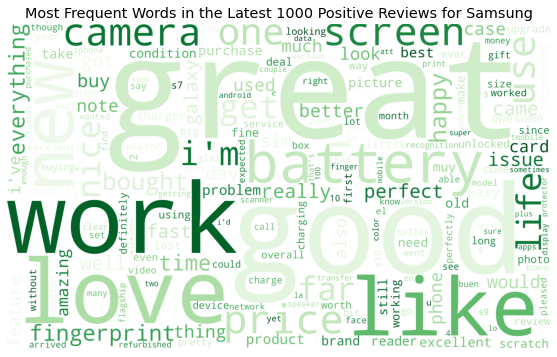

In [ ]:
# 2.5 Plot wordclouds for latest 1000 reviews for Samsung
samsung_pos = " ".join(samsung[samsung["positivity"]==1]["clean_text"][0:1000])
samsung_pos_word_freq = word_freq_dict(samsung_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Greens",
                      background_color="white")
wordcloud_from_frequency(samsung_pos_word_freq, "Most Frequent Words in the Latest 1000 Positive Reviews for Samsung")

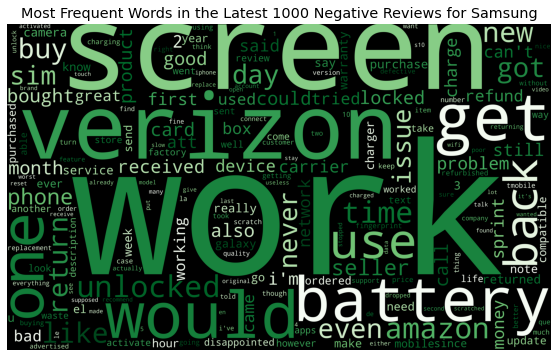

In [ ]:
samsung_neg = " ".join(samsung[samsung["positivity"]==-1]["clean_text"][0:1000])
samsung_neg_word_freq = word_freq_dict(samsung_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Greens",
                      background_color="black")
wordcloud_from_frequency(samsung_neg_word_freq, "Most Frequent Words in the Latest 1000 Negative Reviews for Samsung")

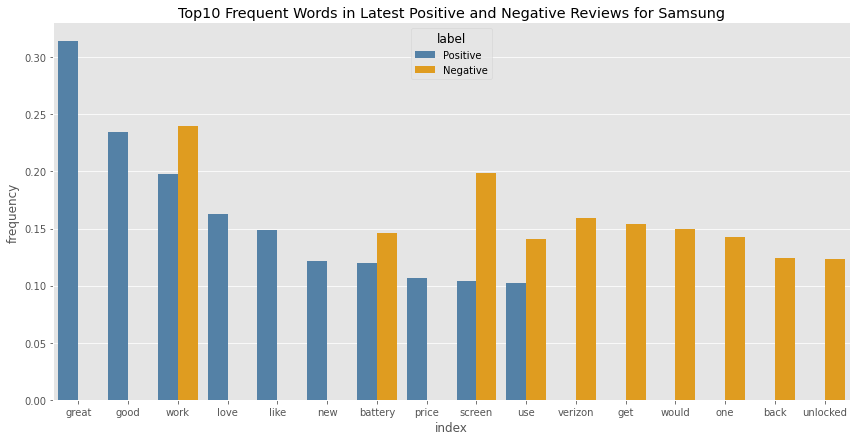

In [ ]:
topn_wordfreq_bar_both(samsung_pos_word_freq, samsung_neg_word_freq, 
                       min(sum(samsung["positivity"]==1), 1000), 
                       min(sum(samsung["positivity"]==-1), 1000), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews for Samsung", 
                       ["steelblue", "orange"], 
                       height=6, aspect=2)

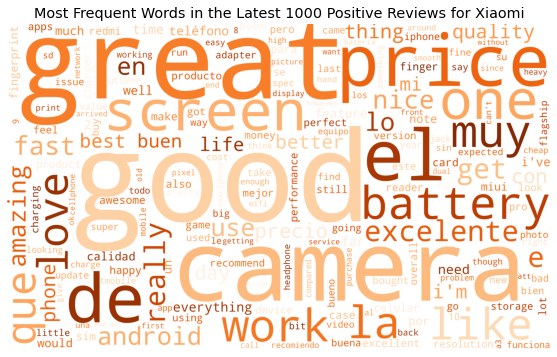

In [ ]:
# 2.6 Plot wordclouds for latest 1000 reviews for Xiaomi
xiaomi_pos = " ".join(xiaomi[xiaomi["positivity"]==1]["clean_text"][0:1000])
xiaomi_pos_word_freq = word_freq_dict(xiaomi_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Oranges",
                      background_color="white")
wordcloud_from_frequency(xiaomi_pos_word_freq, "Most Frequent Words in the Latest 1000 Positive Reviews for Xiaomi")

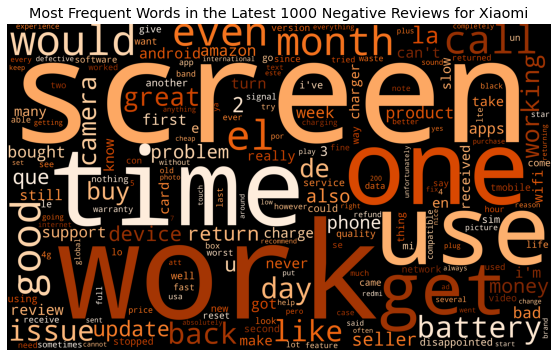

In [ ]:
xiaomi_neg = " ".join(xiaomi[xiaomi["positivity"]==-1]["clean_text"][0:1000])
xiaomi_neg_word_freq = word_freq_dict(xiaomi_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Oranges",
                      background_color="black")
wordcloud_from_frequency(xiaomi_neg_word_freq, "Most Frequent Words in the Latest 1000 Negative Reviews for Xiaomi")

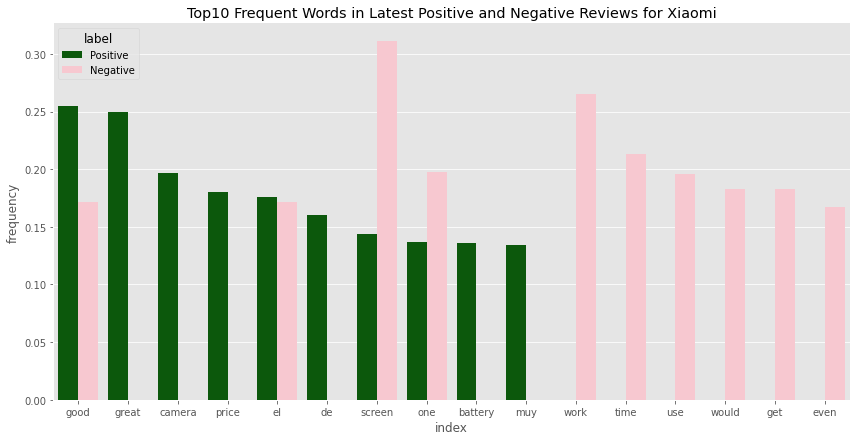

In [ ]:
topn_wordfreq_bar_both(xiaomi_pos_word_freq, xiaomi_neg_word_freq, 
                       min(sum(xiaomi["positivity"]==1), 1000), 
                       min(sum(xiaomi["positivity"]==-1), 1000), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews for Xiaomi", 
                       ["darkgreen", "pink"], 
                       height=6, aspect=2)

In [ ]:
# Step 3: Vectorization and Topic Modelling
# 3.1 Initialize TF-IDF vectorizer
import time
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.05, stop_words="english")

In [ ]:
# 3.2 Initalize LDA model
from sklearn.decomposition import LatentDirichletAllocation
n_topics=10
lda = LatentDirichletAllocation(n_components=n_topics, 
                                max_iter=50, 
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [ ]:
def print_topn_words(model, feature_names, topn):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-topn - 1:-1]])
        print(message)
    print()

In [ ]:
# 3.4 Run LDA model for Apple
t0 = time.time()
apple_tfidf = tfidf_vectorizer.fit_transform(apple["clean_text"])
apple_tfidf_feature_names = tfidf_vectorizer.get_feature_names()
lda.fit(apple_tfidf)
print("Below is the output from LDA model with {} topics (each includes Top10 words) for Apple.".format(n_topics))
print_topn_words(lda, apple_tfidf_feature_names, 10)
print("Done in %0.3fs." % (time.time() - t0))

Below is the output from LDA model with 10 topics (each includes Top10 words) for Apple.
Topic #0: like new look brand work came scratch battery happy buy
Topic #1: problem working day got refurbished iphone work screen time seller
Topic #2: iphone bought use buy refurbished new got purchase work day
Topic #3: charger time came work good got screen great scratch like
Topic #4: great price issue review got use day scratch battery like
Topic #5: product far good great working work new scratch buy came
Topic #6: screen scratch seller purchase happy battery new came review iphone
Topic #7: love work unlocked great bought scratch use iphone day new
Topic #8: good battery life scratch work new iphone day came great
Topic #9: condition perfect came great work scratch new iphone good battery

Done in 24.214s.


In [ ]:
# Run the model for Samsung
t0 = time.time()
samsung_tfidf = tfidf_vectorizer.fit_transform(samsung["clean_text"])
samsung_tfidf_feature_names = tfidf_vectorizer.get_feature_names()
lda.fit(samsung_tfidf)
print("Below is the output from LDA model with {} topics (each includes Top10 words) for Samsung.".format(n_topics))
print_topn_words(lda, samsung_tfidf_feature_names, 10)
print("Done in %0.3fs." % (time.time() - t0))

Below is the output from LDA model with 10 topics (each includes Top10 words) for Samsung.
Topic #0: new issue galaxy ve like note work time phone screen
Topic #1: product like buy new good great time phone work day
Topic #2: great note price better work love use new screen buy
Topic #3: battery life need used great day screen use good camera
Topic #4: good price got better great new work camera like use
Topic #5: work bought phone great new use got like time good
Topic #6: love sim card new work use got came great need
Topic #7: screen verizon really like use note work time got phone
Topic #8: fast came far camera great good new work screen love
Topic #9: use problem time month day got screen phone bought work

Done in 154.371s.


In [ ]:
# Run the model for Xiaomi
t0 = time.time()
xiaomi_tfidf = tfidf_vectorizer.fit_transform(xiaomi["clean_text"])
xiaomi_tfidf_feature_names = tfidf_vectorizer.get_feature_names()
lda.fit(xiaomi_tfidf)
print("Below is the output from LDA model with {} topics (each includes Top10 words) for Xiaomi.".format(n_topics))
print_topn_words(lda, xiaomi_tfidf_feature_names, 10)
print("Done in %0.3fs." % (time.time() - t0))

Below is the output from LDA model with 10 topics (each includes Top10 words) for Xiaomi.
Topic #0: screen amazing day better battery camera need great use price
Topic #1: money la en muy el excelente better mi great buy
Topic #2: best android phone ve fast like camera using really feature
Topic #3: work like time issue bought using thing great use buy
Topic #4: nice battery fast good really camera life great feature price
Topic #5: great price far camera work fast like quality good screen
Topic #6: el que lo la muy en excelente mi android use
Topic #7: love muy buy great thing bought screen using price quality
Topic #8: excelente quality camera great price good muy use need buy
Topic #9: good excellent mi use price fast camera screen quality work

Done in 23.288s.


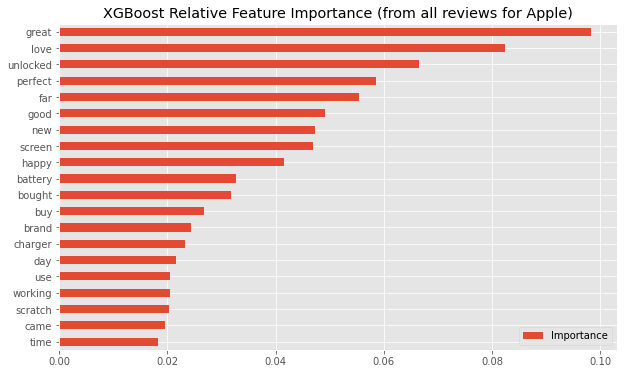

In [ ]:
# Step 4: Plot feature importance using XGBoost
# 4.1 for Apple
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(apple_tfidf, apple["positivity"])
featureImport = pd.DataFrame(xgb_clf.feature_importances_, index=apple_tfidf_feature_names)
featureImport.columns = ["Importance"]
featureImport.sort_values(["Importance"], ascending=True).tail(20).plot(kind="barh", figsize=(10, 6))
plt.title("XGBoost Relative Feature Importance (from all reviews for Apple)")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes,positivity,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,price,originalPrice,month,clean_text
0,B0000SX2UC,Janet,3,2005-10-11,False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,2005-10-01,a600 awhile absolute doo doo read review detec...
1,B0000SX2UC,Luke Wyatt,1,2004-01-07,False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,-1,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,2004-01-01,due software issue sprint phone's text messagi...
2,B0000SX2UC,Brooke,5,2003-12-30,False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,1,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,2003-12-01,great reliable also purchased a460 died menu e...
3,B0000SX2UC,amy m. teague,3,2004-03-18,False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,2004-03-01,love really need one expect price bill receive...
4,B0000SX2UC,tristazbimmer,4,2005-08-28,False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,1,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,2005-08-01,great every purpose offer except day bought it...


In [ ]:
reviews1=pd.read_csv(url)
items1=pd.read_csv(url1)

In [ ]:
df = pd.merge(items1, reviews1, how='right', on='asin')


In [ ]:
df.head()

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,url,image,rating_y,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
df = df[['asin', 'brand', 'rating_x', 'totalReviews', 'rating_y', 'title_y', 'body', 'helpfulVotes']]
df.head()

,asin,brand,rating_x,totalReviews,rating_y,title_y,body,helpfulVotes
0,B0000SX2UC,NaN,3,14,3.0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,NaN,1,14,3.0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,NaN,5,14,3.0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,NaN,3,14,3.0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,"I love the phone and all, because I really did...",1.0
4,B0000SX2UC,NaN,4,14,3.0,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,The phone has been great for every purpose it ...,1.0


In [ ]:
df.isnull().sum()

asin                0
brand             200
rating_x            0
totalReviews        0
rating_y            0
title_y             0
body               21
helpfulVotes    40771
dtype: int64

In [ ]:
del df['helpfulVotes']

In [ ]:
df.isnull().sum()

asin              0
brand           200
rating_x          0
totalReviews      0
rating_y          0
title_y           0
body             21
dtype: int64

In [ ]:
df.dropna(inplace=True)


In [ ]:
df.isnull().sum()

asin            0
brand           0
rating_x        0
totalReviews    0
rating_y        0
title_y         0
body            0
dtype: int64

In [ ]:
len(df['asin'])

67765

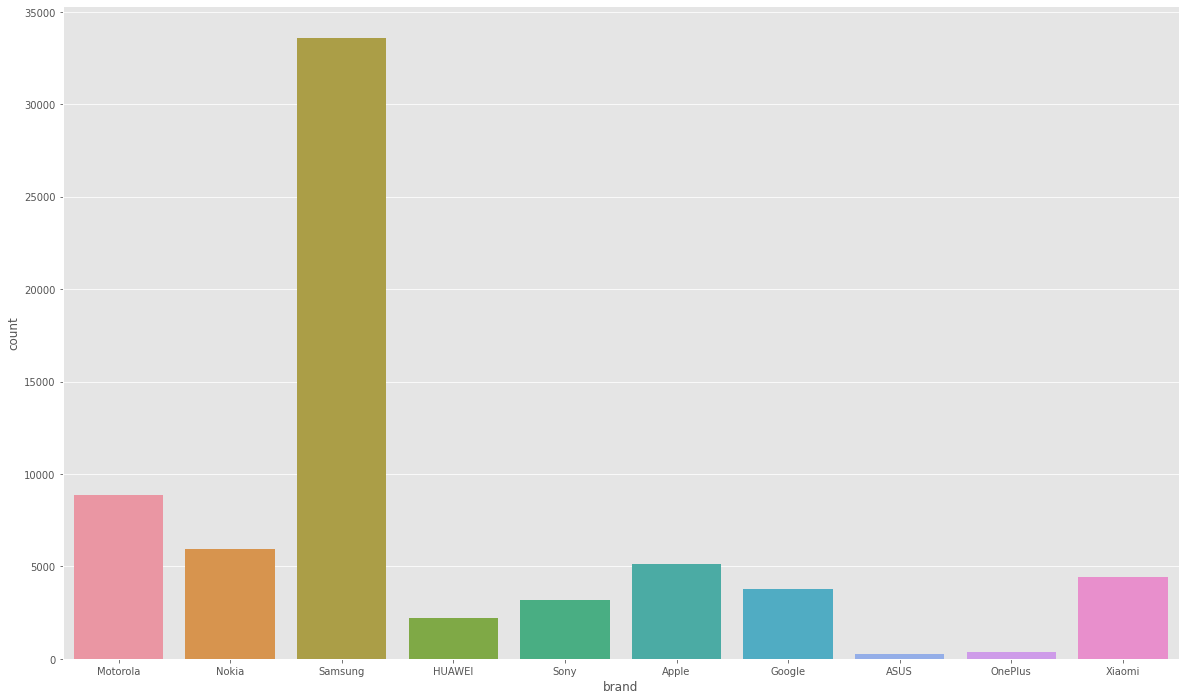

In [ ]:
plt.figure(figsize=(20,12))
sns.countplot(x = 'brand', data =df)

Brand vs Total review

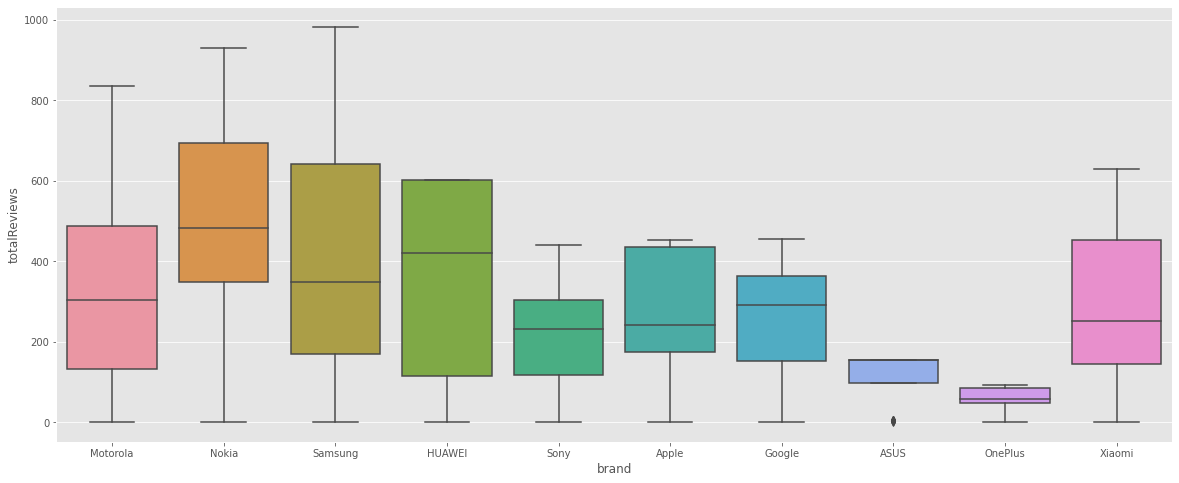

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='brand', y= 'totalReviews', data =df)

In [ ]:
df.head()


,asin,brand,rating_x,totalReviews,rating_y,title_y,body
14,B0009N5L7K,Motorola,1,7,3.0,Motorola I265 phone,DON'T BUY OUT OF SERVICE
15,B0009N5L7K,Motorola,4,7,3.0,Motorola I265 phone,I have been with nextel for nearly a year now ...
16,B0009N5L7K,Motorola,5,7,3.0,Motorola I265 phone,"I just got it and have to say its easy to use,..."
17,B0009N5L7K,Motorola,1,7,3.0,Motorola I265 phone,1 star because the phones locked so I have to ...
18,B0009N5L7K,Motorola,5,7,3.0,Motorola I265 phone,The product has been very good. I had used thi...


In [ ]:
df['body'] = df['body'].str.lower()
df['title_y'] = df['title_y'].str.lower()


In [ ]:
import re
import string
import nltk

In [ ]:
def remove_punctuation(text):
    no_punct = ''.join([c for c in text if c not in string.punctuation])
    return no_punct


In [ ]:
df['body'] = df['body'].apply(lambda x: remove_punctuation(x))
df['title_y'] = df['title_y'].apply(lambda x: remove_punctuation(x))

In [ ]:
df.head()

,asin,brand,rating_x,totalReviews,rating_y,title_y,body
14,B0009N5L7K,Motorola,1,7,3.0,motorola i265 phone,dont buy out of service
15,B0009N5L7K,Motorola,4,7,3.0,motorola i265 phone,i have been with nextel for nearly a year now ...
16,B0009N5L7K,Motorola,5,7,3.0,motorola i265 phone,i just got it and have to say its easy to use ...
17,B0009N5L7K,Motorola,1,7,3.0,motorola i265 phone,1 star because the phones locked so i have to ...
18,B0009N5L7K,Motorola,5,7,3.0,motorola i265 phone,the product has been very good i had used this...


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
sid.polarity_scores(df['body'].iloc[11])

{'compound': 0.2382, 'neg': 0.0, 'neu': 0.947, 'pos': 0.053}

In [ ]:
df['title_score'] = df['title_y'].apply(lambda x: sid.polarity_scores(x))

In [ ]:
df.head()

,asin,brand,rating_x,totalReviews,rating_y,title_y,body,title_score
14,B0009N5L7K,Motorola,1,7,3.0,motorola i265 phone,dont buy out of service,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
15,B0009N5L7K,Motorola,4,7,3.0,motorola i265 phone,i have been with nextel for nearly a year now ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
16,B0009N5L7K,Motorola,5,7,3.0,motorola i265 phone,i just got it and have to say its easy to use ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
17,B0009N5L7K,Motorola,1,7,3.0,motorola i265 phone,1 star because the phones locked so i have to ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
18,B0009N5L7K,Motorola,5,7,3.0,motorola i265 phone,the product has been very good i had used this...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
df['title_compound'] = df['title_score'].apply(lambda x: x['compound'])
df.head()

,asin,brand,rating_x,totalReviews,rating_y,title_y,body,title_score,title_compound
14,B0009N5L7K,Motorola,1,7,3.0,motorola i265 phone,dont buy out of service,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
15,B0009N5L7K,Motorola,4,7,3.0,motorola i265 phone,i have been with nextel for nearly a year now ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
16,B0009N5L7K,Motorola,5,7,3.0,motorola i265 phone,i just got it and have to say its easy to use ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
17,B0009N5L7K,Motorola,1,7,3.0,motorola i265 phone,1 star because the phones locked so i have to ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
18,B0009N5L7K,Motorola,5,7,3.0,motorola i265 phone,the product has been very good i had used this...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0


In [ ]:
df['title_com_review'] = df['title_compound'].apply(lambda x: 'pos' if x>= 0.05 else 'neg')
df.head()

,asin,brand,rating_x,totalReviews,rating_y,title_y,body,title_score,title_compound,title_com_review
14,B0009N5L7K,Motorola,1,7,3.0,motorola i265 phone,dont buy out of service,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neg
15,B0009N5L7K,Motorola,4,7,3.0,motorola i265 phone,i have been with nextel for nearly a year now ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neg
16,B0009N5L7K,Motorola,5,7,3.0,motorola i265 phone,i just got it and have to say its easy to use ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neg
17,B0009N5L7K,Motorola,1,7,3.0,motorola i265 phone,1 star because the phones locked so i have to ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neg
18,B0009N5L7K,Motorola,5,7,3.0,motorola i265 phone,the product has been very good i had used this...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neg


In [ ]:
df['title_com_review'].value_counts()

neg    63122
pos     4643
Name: title_com_review, dtype: int64

In [ ]:
df['body_score'] = df['body'].apply(lambda x: sid.polarity_scores(x))
df.head()

,asin,brand,rating_x,totalReviews,rating_y,title_y,body,title_score,title_compound,title_com_review,body_score
14,B0009N5L7K,Motorola,1,7,3.0,motorola i265 phone,dont buy out of service,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neg,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
15,B0009N5L7K,Motorola,4,7,3.0,motorola i265 phone,i have been with nextel for nearly a year now ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neg,"{'neg': 0.061, 'neu': 0.783, 'pos': 0.157, 'co..."
16,B0009N5L7K,Motorola,5,7,3.0,motorola i265 phone,i just got it and have to say its easy to use ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neg,"{'neg': 0.155, 'neu': 0.696, 'pos': 0.149, 'co..."
17,B0009N5L7K,Motorola,1,7,3.0,motorola i265 phone,1 star because the phones locked so i have to ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neg,"{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp..."
18,B0009N5L7K,Motorola,5,7,3.0,motorola i265 phone,the product has been very good i had used this...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neg,"{'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'comp..."


In [ ]:
df['body_compound'] = df['body_score'].apply(lambda x: x['compound'])
df['body_com_review'] = df['body_compound'].apply(lambda x: 'pos' if x>= 0.05 else 'neg')
df.head()

,asin,brand,rating_x,totalReviews,rating_y,title_y,body,title_score,title_compound,title_com_review,body_score,body_compound,body_com_review
14,B0009N5L7K,Motorola,1,7,3.0,motorola i265 phone,dont buy out of service,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neg,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neg
15,B0009N5L7K,Motorola,4,7,3.0,motorola i265 phone,i have been with nextel for nearly a year now ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neg,"{'neg': 0.061, 'neu': 0.783, 'pos': 0.157, 'co...",0.8658,pos
16,B0009N5L7K,Motorola,5,7,3.0,motorola i265 phone,i just got it and have to say its easy to use ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neg,"{'neg': 0.155, 'neu': 0.696, 'pos': 0.149, 'co...",-0.0516,neg
17,B0009N5L7K,Motorola,1,7,3.0,motorola i265 phone,1 star because the phones locked so i have to ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neg,"{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp...",-0.1689,neg
18,B0009N5L7K,Motorola,5,7,3.0,motorola i265 phone,the product has been very good i had used this...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neg,"{'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'comp...",0.8777,pos


Text(0.5, 1.0, 'Title sentiment analysis')

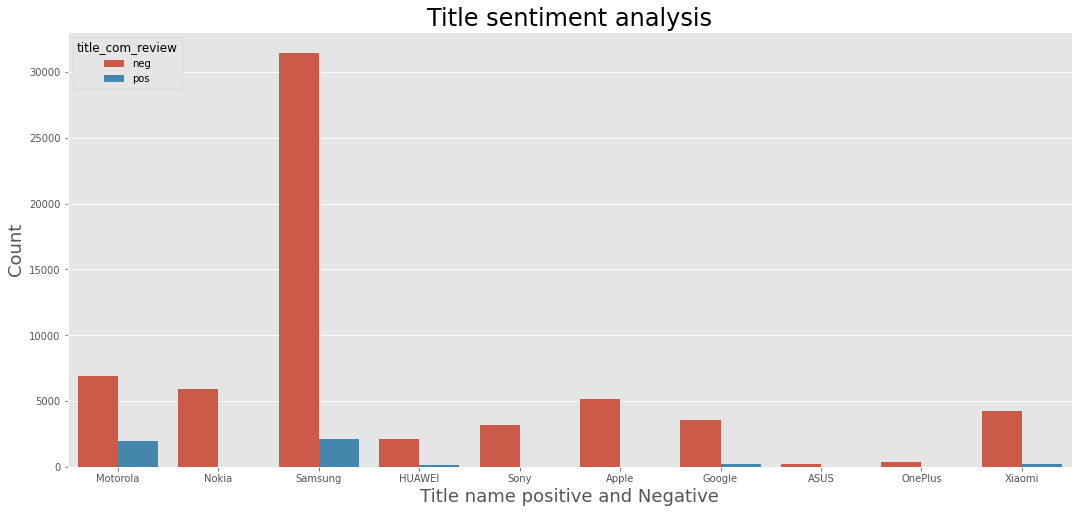

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(x = 'brand', hue = 'title_com_review', data = df)
plt.xlabel('Title name positive and Negative', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.title('Title sentiment analysis', fontsize = 24)

Text(0.5, 1.0, 'Comments sentiment analysis')

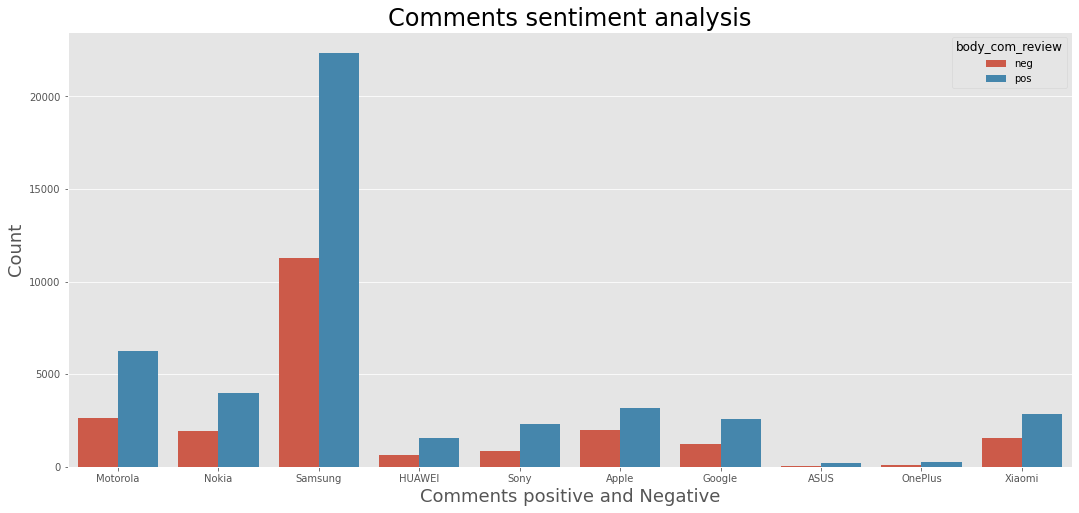

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(x = 'brand', hue = 'body_com_review', data = df)
plt.xlabel('Comments positive and Negative', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.title('Comments sentiment analysis', fontsize = 24)

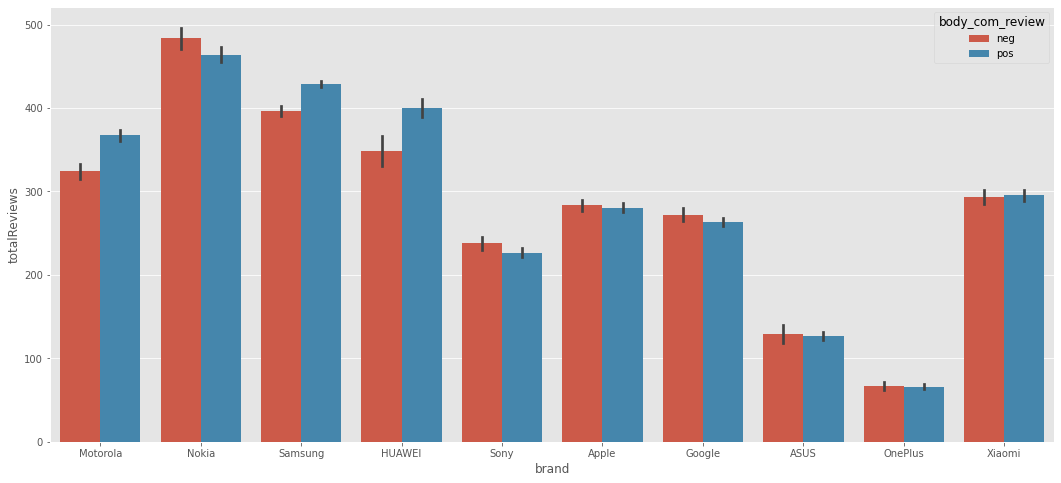

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x = 'brand', y = 'totalReviews', hue = 'body_com_review', data = df)

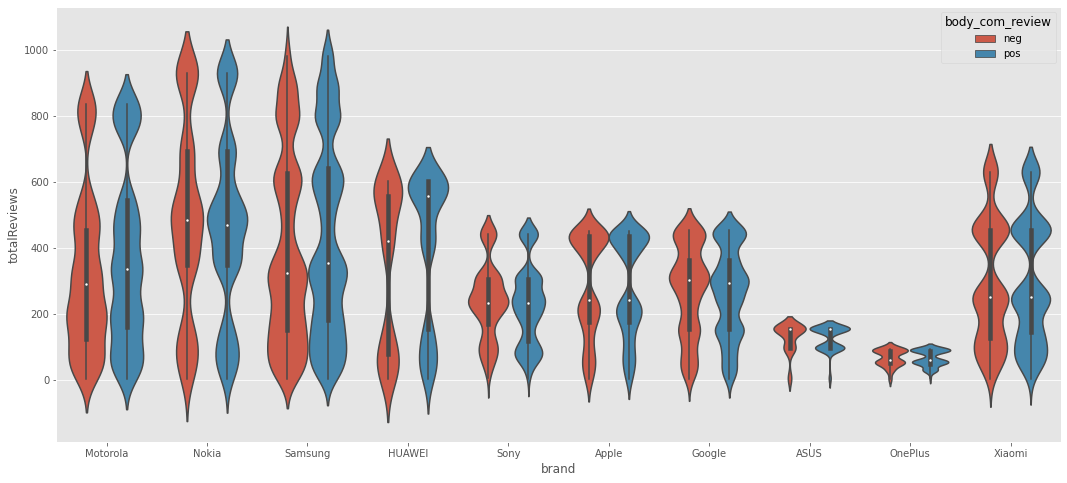

In [ ]:
plt.figure(figsize=(18,8))
sns.violinplot(x = 'brand', y = 'totalReviews', hue = 'body_com_review', data = df)

Text(0, 0.5, 'Total Count')

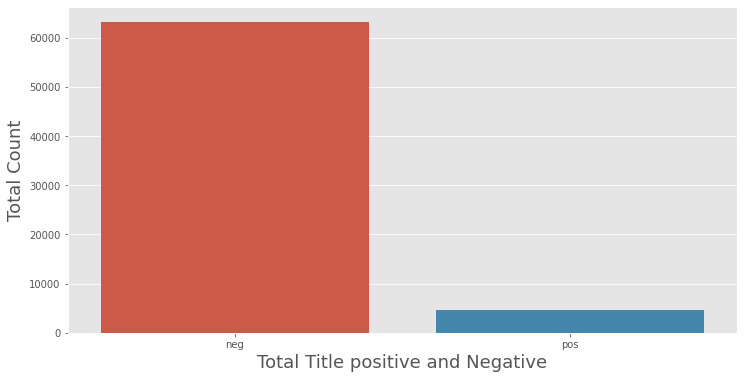

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'title_com_review', data = df)
plt.xlabel('Total Title positive and Negative', fontsize = 18)
plt.ylabel('Total Count', fontsize = 18)

Text(0.5, 0, 'Total comments positive and Neg')

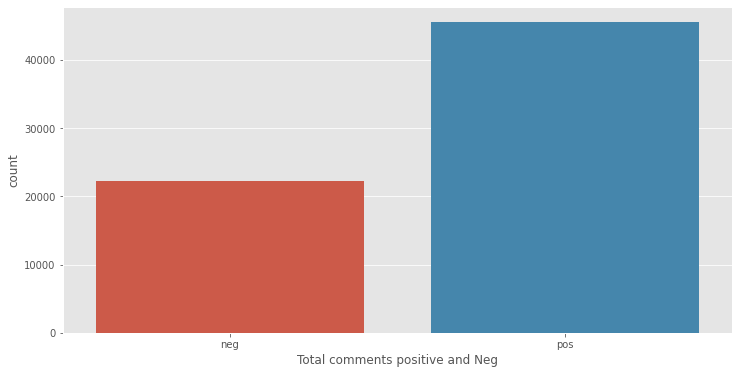

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'body_com_review', data = df)
plt.xlabel('Total comments positive and Neg')

In [ ]:
df['body_com_review'].value_counts()

pos    45489
neg    22276
Name: body_com_review, dtype: int64

In [ ]:
df.head()

,asin,brand,rating_x,totalReviews,rating_y,title_y,body,title_score,title_compound,title_com_review,body_score,body_compound,body_com_review
14,B0009N5L7K,Motorola,1,7,3.0,motorola i265 phone,dont buy out of service,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neg,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neg
15,B0009N5L7K,Motorola,4,7,3.0,motorola i265 phone,i have been with nextel for nearly a year now ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neg,"{'neg': 0.061, 'neu': 0.783, 'pos': 0.157, 'co...",0.8658,pos
16,B0009N5L7K,Motorola,5,7,3.0,motorola i265 phone,i just got it and have to say its easy to use ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neg,"{'neg': 0.155, 'neu': 0.696, 'pos': 0.149, 'co...",-0.0516,neg
17,B0009N5L7K,Motorola,1,7,3.0,motorola i265 phone,1 star because the phones locked so i have to ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neg,"{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp...",-0.1689,neg
18,B0009N5L7K,Motorola,5,7,3.0,motorola i265 phone,the product has been very good i had used this...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neg,"{'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'comp...",0.8777,pos


Text(0.5, 1.0, 'Comments sentiment analysis vs rating_y')

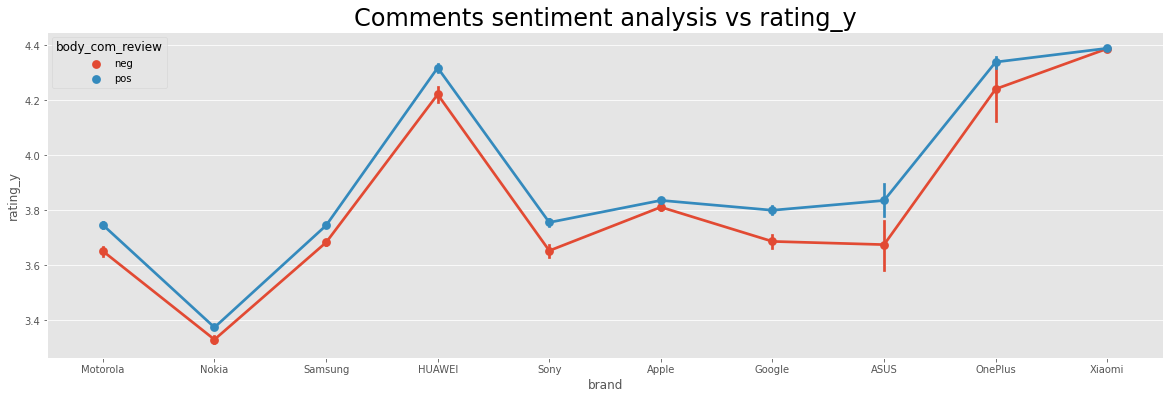

In [ ]:
plt.figure(figsize=(20,6))
sns.pointplot(x = 'brand', y = 'rating_y', hue = 'body_com_review', data = df)
plt.title('Comments sentiment analysis vs rating_y', fontsize = 24)

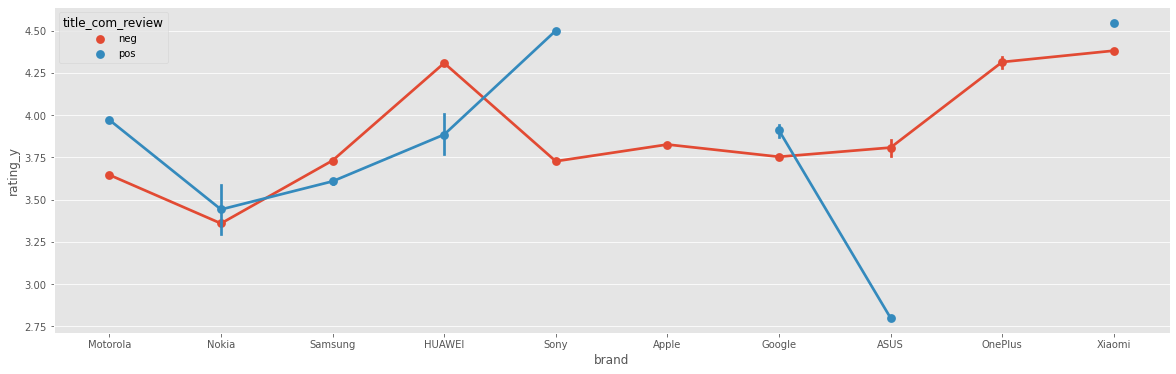

In [ ]:
plt.figure(figsize=(20,6))
sns.pointplot(x = 'brand', y = 'rating_y', hue = 'title_com_review', data = df)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
print(classification_report(df['title_com_review'], df['body_com_review']))

              precision    recall  f1-score   support

         neg       0.93      0.33      0.49     63122
         pos       0.07      0.68      0.13      4643

    accuracy                           0.35     67765
   macro avg       0.50      0.51      0.31     67765
weighted avg       0.88      0.35      0.46     67765



In [ ]:
print(accuracy_score(df['title_com_review'], df['body_com_review'], normalize=True, sample_weight=None))

0.35403231756806613
